In [1]:
import pandas as pd
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from sklearn import preprocessing

In [2]:
all_df= pd.read_csv('train_new.csv')
all_df.head()

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,address,capa
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,...,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ,宮城県仙台市泉区七北田字柳78,19694
1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,...,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀,愛知県豊田市千石町7-2,40000
2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,...,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人,大阪府吹田市千里万博公園5-2,21000
3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,...,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也,広島県広島市安佐南区大塚西5-1-1,50000
4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,...,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一,北海道札幌市豊平区羊ヶ丘1,39232


In [3]:
test_df= pd.read_csv('test_new.csv')
test_df.head()

,id,year,stage,match,gameday,time,home,away,stadium,tv,...,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,address,capa
0,15822,2014,Ｊ１,第１８節第１日,08/02(土),19:04,ベガルタ仙台,大宮アルディージャ,ユアテックスタジアム仙台,スカパー！／スカパー！プレミアムサービス,...,横山 知伸,高橋 祥平,橋本 晃司,和田 拓也,家長 昭博,富山 貴光,ムルジャ,ズラタン,宮城県仙台市泉区七北田字柳78,19694
1,15823,2014,Ｊ１,第１８節第１日,08/02(土),18:34,鹿島アントラーズ,サンフレッチェ広島,県立カシマサッカースタジアム,スカパー！／スカパー！プレミアムサービス,...,水本 裕貴,柏 好文,柴﨑 晃誠,森﨑 和幸,山岸 智,石原 直樹,髙萩 洋次郎,佐藤 寿人,茨城県鹿嶋市神向寺後山26-2,40728
2,15824,2014,Ｊ１,第１８節第１日,08/02(土),19:04,浦和レッズ,ヴィッセル神戸,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／ＮＨＫ ＢＳ１／テレ玉,...,大屋 翼,橋本 英郎,杉浦 恭平,奥井 諒,高橋 峻希,小川 慶治朗,森岡 亮太,マルキーニョス,埼玉県さいたま市緑区中野田500,63700
3,15825,2014,Ｊ１,第１８節第１日,08/02(土),19:03,柏レイソル,川崎フロンターレ,日立柏サッカー場,スカパー！／スカパー！プレミアムサービス,...,谷口 彰悟,登里 享平,大島 僚太,中村 憲剛,森谷 賢太郎,金久保 順,小林 悠,大久保 嘉人,千葉県柏市日立台1-2-50,15349
4,15827,2014,Ｊ１,第１８節第１日,08/02(土),19:03,アルビレックス新潟,セレッソ大阪,デンカビッグスワンスタジアム,スカパー！／スカパー！プレミアムサービス,...,安藤 淳,山下 達也,扇原 貴宏,山口 蛍,キム ソンジュン,フォルラン,南野 拓実,杉本 健勇,新潟県新潟市中央区清五郎67-12,42300


In [4]:
all_df.columns

Index(['id', 'y', 'year', 'stage', 'match', 'gameday', 'time', 'home', 'away',
       'stadium', 'tv', 'home_score', 'away_score', 'weather', 'temperature',
       'humidity', 'referee', 'home_team', 'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'away_team', 'away_01', 'away_02', 'away_03',
       'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09',
       'away_10', 'away_11', 'address', 'capa'],
      dtype='object')

In [5]:
print(all_df.shape)
print(test_df.shape)

(1953, 43)
(313, 42)


In [6]:
#欠損値の確認(train)
all_df.isnull().sum()

id             0
y              0
year           0
stage          0
match          0
gameday        0
time           0
home           0
away           0
stadium        0
tv             0
home_score     0
away_score     0
weather        0
temperature    0
humidity       0
referee        0
home_team      0
home_01        0
home_02        0
home_03        0
home_04        0
home_05        0
home_06        0
home_07        0
home_08        0
home_09        0
home_10        0
home_11        0
away_team      0
away_01        0
away_02        0
away_03        0
away_04        0
away_05        0
away_06        0
away_07        0
away_08        0
away_09        0
away_10        0
away_11        0
address        0
capa           0
dtype: int64

In [7]:
#欠損値の確認(test)
test_df.isnull().sum()

id             0
year           0
stage          0
match          0
gameday        0
time           0
home           0
away           0
stadium        0
tv             0
home_score     0
away_score     0
weather        0
temperature    0
humidity       0
referee        0
home_team      0
home_01        0
home_02        0
home_03        0
home_04        0
home_05        0
home_06        0
home_07        0
home_08        0
home_09        0
home_10        0
home_11        0
away_team      0
away_01        0
away_02        0
away_03        0
away_04        0
away_05        0
away_06        0
away_07        0
away_08        0
away_09        0
away_10        0
away_11        0
address        0
capa           0
dtype: int64

In [8]:
#変数を減らす
all_df=all_df.loc[:,['id', 'y', 'year', 'stage', 'match', 'gameday', 'time', 'home', 'away','stadium', 'tv', 'weather', 'temperature',
                     'humidity', 'capa']]
all_df.head()

,id,y,year,stage,match,gameday,time,home,away,stadium,tv,weather,temperature,humidity,capa
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合,雨,3.8,66%,19694
1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋,屋内,12.4,43%,40000
2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪,晴一時雨,11.3,41%,21000
3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島,曇一時雨のち晴,11.4,52%,50000
4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌,屋内,22.5,32%,39232


In [9]:
##前処理
#外れ値の処理
for i in range(len(all_df)):
    if all_df.loc[i,'y']==0 or all_df.loc[i,'y']>=60000:
        all_df=all_df.drop(i,axis=0)
        print(i)
all_df.index = np.arange(len(all_df))
all_df.head()
#matchの〇節を抽出
all_df['match'] = all_df['match'].apply(lambda x: x[1:].rsplit('節', 1)[0])
#TVのマッピング
for i in range(len(all_df)):
    if 'ＮＨＫ総合' in all_df.loc[i,'tv']:
        all_df.loc[i,'tv']=0
    elif 'ＮＨＫ' in all_df.loc[i,'tv']:
        all_df.loc[i,'tv']=1
    elif  'ＢＳ' in all_df.loc[i,'tv']:
        all_df.loc[i,'tv']=1
    else:
        all_df.loc[i,'tv']=2
#gameday→曜日
all_df['gameday'] = all_df['gameday'].apply(lambda x: x[:-1].rsplit('(', 1)[-1])
#曜日マッピング
for i in range(len(all_df)):
    if all_df.loc[i,'gameday'] =='火'or all_df.loc[i,'gameday'] =='水'or all_df.loc[i,'gameday'] =='木'or all_df.loc[i,'gameday'] =='金':
        all_df.loc[i,'gameday']=0
    else:
        all_df.loc[i,'gameday']=1
#time→〇時
all_df['time'] =all_df['time'].apply(lambda x: x.split(':', 1)[0])
#〇時→デイorナイト
for i in range(len(all_df)):
    if all_df.loc[i,'time'] =='18':
        all_df.loc[i,'time']=0
    elif all_df.loc[i,'time']=='19':
        all_df.loc[i,'time']=0
    else:
        all_df.loc[i,'time']=1
#曜日＆デイorナイト,weatherマッピング
for i in range(len(all_df)):
    if all_df.loc[i,'gameday'] ==0 and all_df.loc[i,'time']==1:
        all_df.loc[i,'time']=0
    elif all_df.loc[i,'gameday'] ==0 and all_df.loc[i,'time']==0:
        all_df.loc[i,'time']=1
    elif all_df.loc[i,'gameday'] ==1 and all_df.loc[i,'time']==0:
        all_df.loc[i,'time']=2
    else:
        all_df.loc[i,'time']=3
    if '雨' in all_df.loc[i,'weather']:
        all_df.loc[i,'weather']=0
    elif '雪' in all_df.loc[i,'weather']:
        all_df.loc[i,'weather']=0
    elif  '晴' in all_df.loc[i,'weather']:
        all_df.loc[i,'weather']=2
    elif  '屋内' in all_df.loc[i,'weather']:
        all_df.loc[i,'weather']=2
    else:
        all_df.loc[i,'weather']=1
#humidityの数字を取り出す
all_df['humidity'] = all_df['humidity'].apply(lambda x: x[:-1].rsplit('%', 1)[-1])
#home,away,stadium,stageのマッピング 
home_df=all_df[['home']]
away_df=all_df[['away']]
stadium_df=all_df[['stadium']]
for column in ['home','stage','away','stadium']:
    le = preprocessing.LabelEncoder()
    le.fit(all_df[column])
    all_df[column] = le.transform(all_df[column])
stadium_number=[]
for i in range(59):
    count=0
    sum=0
    for j in range(len(all_df)):
        if all_df.loc[j,'stadium'] ==i:
            count+=1
            sum+=all_df.loc[j,'y']
    stadium_number.append(sum/count)
home_number=[]
for i in range(43):
    count=0
    sum=0
    for j in range(len(all_df)):
        if all_df.loc[j,'home'] ==i:
            count+=1
            sum+=all_df.loc[j,'y']
    home_number.append(sum/count)
away_number=[]
for i in range(43):
    count=0
    sum=0
    for j in range(len(all_df)):
        if all_df.loc[j,'away'] ==i:
            count+=1
            sum+=all_df.loc[j,'y']
    away_number.append(sum/count)
for j in range(len(all_df)):
    for i in range(59):
        if all_df.loc[j,'stadium'] ==i:
            all_df.loc[j,'stadium']=stadium_number[i]
            break
    for i in range(43):
        if all_df.loc[j,'home'] ==i:
            all_df.loc[j,'home']=home_number[i]
            break
    for i in range(43):
        if all_df.loc[j,'away'] ==i:
            all_df.loc[j,'away']=away_number[i]
            break

all_df.head()

1059
1567


,id,y,year,stage,match,gameday,time,home,away,stadium,tv,weather,temperature,humidity,capa
0,13994,18250,2012,0,１,1,3,15353.904762,20289.139535,15309.292683,0,0,3.8,66,19694
1,13995,24316,2012,0,１,1,3,17226.744186,16572.761905,20624.360000,1,2,12.4,43,40000
2,13996,17066,2012,0,１,1,3,13449.891304,11431.478261,13449.891304,1,0,11.3,41,21000
3,13997,29603,2012,0,１,1,3,16494.209302,23127.880952,16494.209302,1,0,11.4,52,50000
4,13998,25353,2012,0,１,1,3,10837.254902,14579.577778,13362.200000,1,2,22.5,32,39232


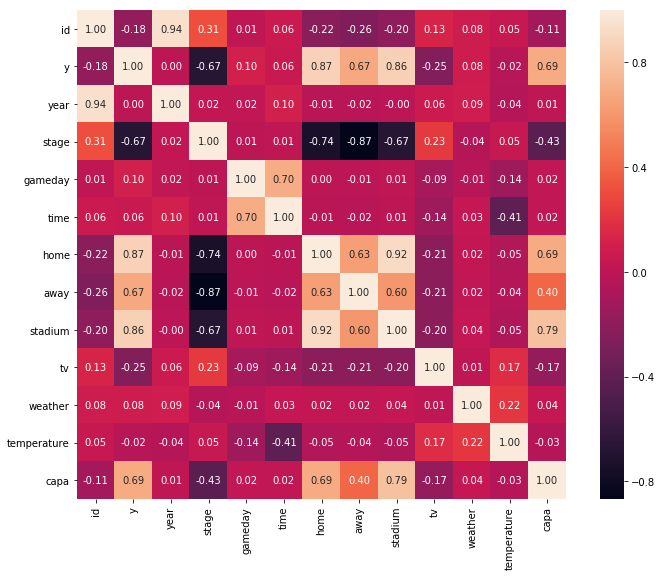

In [10]:
# ヒートマップの表示
plt.figure(figsize=(12, 9))
# annot : 数値を表示するかどうか(annotation)
# square: 四角を正方形に合わせるかどうか
# fmt   : 表示する数値の形式(formatting)
sns.heatmap(all_df.corr(), annot=True, square=True, fmt='.2f')
plt.show()

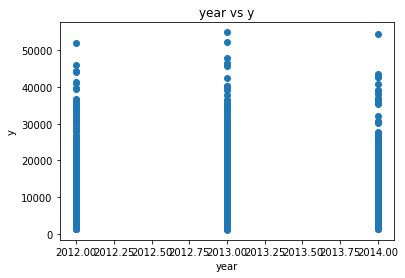

In [11]:
# year vs y
plt.scatter(all_df['year'], all_df['y'])
plt.title('year vs y')
plt.xlabel('year')
plt.ylabel('y')
plt.show()

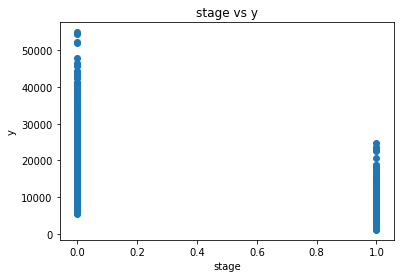

In [12]:
# stage vs y
plt.scatter(all_df['stage'], all_df['y'])
plt.title('stage vs y')
plt.xlabel('stage')
plt.ylabel('y')
plt.show()

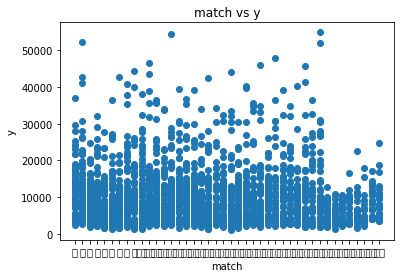

In [13]:
# match vs y
plt.scatter(all_df['match'], all_df['y'])
plt.title('match vs y')
plt.xlabel('match')
plt.ylabel('y')
plt.show()

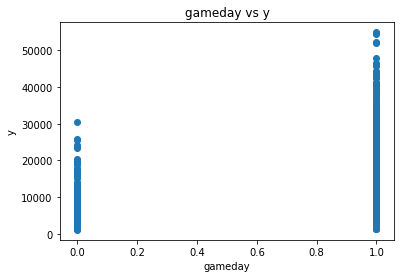

In [14]:
# gameday vs y
plt.scatter(all_df['gameday'], all_df['y'])
plt.title('gameday vs y')
plt.xlabel('gameday')
plt.ylabel('y')
plt.show()

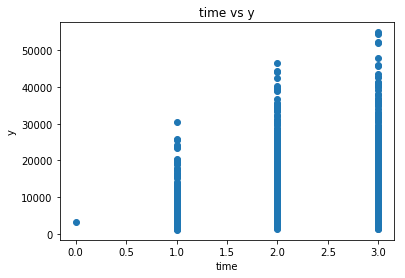

In [15]:
# day&time vs y
plt.scatter(all_df['time'], all_df['y'])
plt.title('time vs y')
plt.xlabel('time')
plt.ylabel('y')
plt.show()

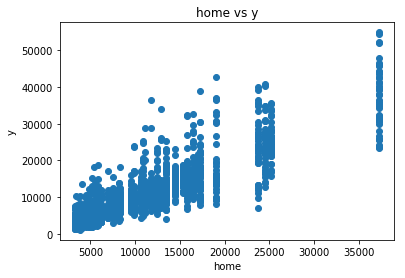

In [16]:
# home vs y
plt.scatter(all_df['home'], all_df['y'])
plt.title('home vs y')
plt.xlabel('home')
plt.ylabel('y')
plt.show()

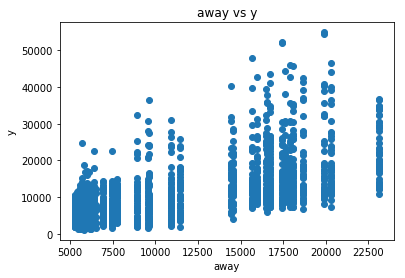

In [17]:
# away vs y
plt.scatter(all_df['away'], all_df['y'])
plt.title('away vs y')
plt.xlabel('away')
plt.ylabel('y')
plt.show()

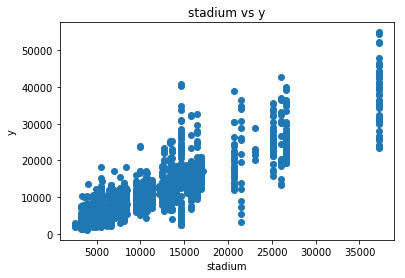

In [18]:
# stadium vs y
plt.scatter(all_df['stadium'], all_df['y'])
plt.title('stadium vs y')
plt.xlabel('stadium')
plt.ylabel('y')
plt.show()

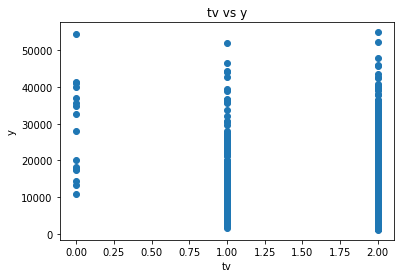

In [19]:
# tv vs y
plt.scatter(all_df['tv'], all_df['y'])
plt.title('tv vs y')
plt.xlabel('tv')
plt.ylabel('y')
plt.show()

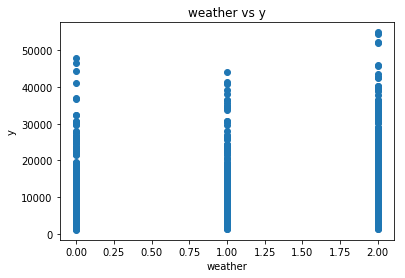

In [20]:
# weather vs y
plt.scatter(all_df['weather'], all_df['y'])
plt.title('weather vs y')
plt.xlabel('weather')
plt.ylabel('y')
plt.show()

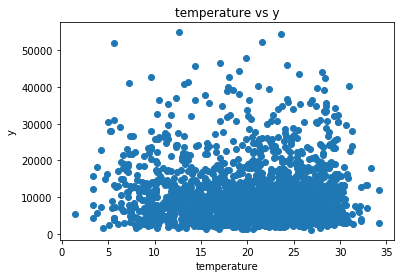

In [21]:
# tempreture vs y
plt.scatter(all_df['temperature'], all_df['y'])
plt.title('temperature vs y')
plt.xlabel('temperature')
plt.ylabel('y')
plt.show()

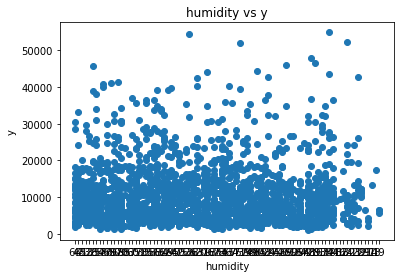

In [22]:
# humidity vs y
plt.scatter(all_df['humidity'], all_df['y'])
plt.title('humidity vs y')
plt.xlabel('humidity')
plt.ylabel('y')
plt.show()

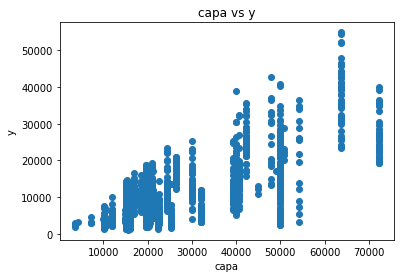

In [23]:
# capa vs y
plt.scatter(all_df['capa'], all_df['y'])
plt.title('capa vs y')
plt.xlabel('capa')
plt.ylabel('y')
plt.show()

In [24]:
#year,match,tv,weather,temperature,humidityを削除
all_df_pickup=all_df.loc[:,[ 'y', 'stage', 'gameday', 'time', 'home', 'away','stadium', 'capa']]
all_df_pickup.head()

,y,stage,gameday,time,home,away,stadium,capa
0,18250,0,1,3,15353.904762,20289.139535,15309.292683,19694
1,24316,0,1,3,17226.744186,16572.761905,20624.360000,40000
2,17066,0,1,3,13449.891304,11431.478261,13449.891304,21000
3,29603,0,1,3,16494.209302,23127.880952,16494.209302,50000
4,25353,0,1,3,10837.254902,14579.577778,13362.200000,39232


In [25]:
y=pd.DataFrame(all_df_pickup, columns=['y'])
y.head()

,y
0,18250
1,24316
2,17066
3,29603
4,25353


In [26]:
x=all_df_pickup.drop('y',axis=1)
x.head()

,stage,gameday,time,home,away,stadium,capa
0,0,1,3,15353.904762,20289.139535,15309.292683,19694
1,0,1,3,17226.744186,16572.761905,20624.360000,40000
2,0,1,3,13449.891304,11431.478261,13449.891304,21000
3,0,1,3,16494.209302,23127.880952,16494.209302,50000
4,0,1,3,10837.254902,14579.577778,13362.200000,39232


In [27]:
#標準化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_std = ss.fit_transform(x)
y_std = ss.fit_transform(y)
from sklearn.model_selection import train_test_split
x_std_train, x_std_test, y_std_train, y_std_test = train_test_split(x_std, y_std, test_size = 0.3, random_state = 0)

In [28]:
#標準化重回帰分析
# 重回帰の線形回帰を実行
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# 重回帰線形モデルの学習
lr.fit(x_std_train, y_std_train)
print(lr.intercept_)
print(lr.coef_)

[0.00455082]
[[ 0.19079635  0.09820575 -0.00275086  0.51822925  0.33015018  0.25008631
   0.08172441]]


In [29]:
#1次回帰
# 重回帰の線形回帰を実行
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
# 重回帰線形モデルの学習
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
#２次回帰
# 重回帰の線形回帰を実行
from sklearn.linear_model import LinearRegression
# 2次関数の変数変換
from sklearn.preprocessing import PolynomialFeatures
# 2次の多項式規定を生成
quad = PolynomialFeatures(degree=2)
# 生成した基底関数で変数変換を実行
x_quad = quad.fit_transform(x)
# random_stateを0に固定してあるので､毎回同じサンプルに分割
x_quad_train, x_quad_test,y_quad_train, y_quad_train = train_test_split(x_quad, y, test_size = 0.3, random_state = 0)
# 線形回帰による学習
model_quad_2 = LinearRegression()
model_quad_2.fit(x_quad_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
#3次回帰
# 3次関数の変数変換
from sklearn.preprocessing import PolynomialFeatures
# 3次の多項式規定を生成
cubic = PolynomialFeatures(degree=3)
# 生成した基底関数で変数変換を実行
x_cubic = cubic.fit_transform(x)
# random_stateを0に固定してあるので､毎回同じサンプルに分割
x_cubic_train, x_cubic_test,y_cubic_train, y_cubic_train = train_test_split(x_cubic, y, test_size = 0.3, random_state = 0)
# 線形回帰による学習
model_cubic_3 = LinearRegression()
model_cubic_3.fit(x_cubic_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
# 自由度調整済み決定係数
# (決定係数, trainまたはtestのサンプル数, 利用した特徴量の数)
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score
#1次関数
print('1次')
print('train: %3f' % adjusted(lr.score(x_train, y_train), len(y_train), 2))
print('test : %3f' % adjusted(lr.score(x_test, y_test), len(y_test), 2))
# 2次関数
print('2次')
print('train: %.3f' % adjusted(model_quad_2.score(x_quad_train, y_train), len(y_train), 3))
print('test : %.3f' % adjusted(model_quad_2.score(x_quad_test, y_test), len(y_test), 3))
# 3次関数
print('3次')
print('train: %.3f' % adjusted(model_cubic_3.score(x_cubic_train, y_train), len(y_train), 3))
print('test : %.3f' % adjusted(model_cubic_3.score(x_cubic_test, y_test), len(y_test), 3))
print('')

1次
train: 0.822725
test : 0.844141
2次
train: 0.859
test : 0.868
3次
train: 0.863
test : 0.848



In [33]:
# MSEを出力する関数を読み込む
from sklearn.metrics import mean_squared_error as mse

#1次関数
print('1次')
print('train: %.3f' % (mse(y_train, lr.predict(x_train)) ** (1/2)))
print('test : %.3f' % (mse(y_test, lr.predict(x_test)) ** (1/2)))
#2次関数
print('2次')
print('train: %.3f' % (mse(y_train, model_quad_2.predict(x_quad_train)) ** (1/2)))
print('test : %.3f' % (mse(y_test, model_quad_2.predict(x_quad_test)) ** (1/2)))
#3次関数
print('3次')
print('train: %.3f' % (mse(y_train, model_cubic_3.predict(x_cubic_train)) ** (1/2)))
print('test : %.3f' % (mse(y_test, model_cubic_3.predict(x_cubic_test)) ** (1/2)))

1次
train: 3347.160
test : 3212.319
2次
train: 2984.082
test : 2950.222
3次
train: 2943.628
test : 3173.844


In [34]:
#testデータに適用
test_df_pickup=test_df.loc[:,[ 'stage', 'gameday', 'time', 'home', 'away','stadium', 'capa']]
test_df_pickup.head()

,stage,gameday,time,home,away,stadium,capa
0,Ｊ１,08/02(土),19:04,ベガルタ仙台,大宮アルディージャ,ユアテックスタジアム仙台,19694
1,Ｊ１,08/02(土),18:34,鹿島アントラーズ,サンフレッチェ広島,県立カシマサッカースタジアム,40728
2,Ｊ１,08/02(土),19:04,浦和レッズ,ヴィッセル神戸,埼玉スタジアム２００２,63700
3,Ｊ１,08/02(土),19:03,柏レイソル,川崎フロンターレ,日立柏サッカー場,15349
4,Ｊ１,08/02(土),19:03,アルビレックス新潟,セレッソ大阪,デンカビッグスワンスタジアム,42300


In [35]:
##前処理
#gameday→曜日
test_df_pickup['gameday'] = test_df_pickup['gameday'].apply(lambda x: x[:-1].rsplit('(', 1)[-1])
#曜日マッピング
for i in range(len(test_df_pickup)):
    if test_df_pickup.loc[i,'gameday'] =='水':
        test_df_pickup.loc[i,'gameday']=0
    else:
        test_df_pickup.loc[i,'gameday']=1
#time→〇時
test_df_pickup['time'] =test_df_pickup['time'].apply(lambda x: x.split(':', 1)[0])
#〇時→デイorナイト
for i in range(len(test_df_pickup)):
    if test_df_pickup.loc[i,'time'] =='18':
        test_df_pickup.loc[i,'time']=0
    elif test_df_pickup.loc[i,'time']=='19':
        test_df_pickup.loc[i,'time']=0
    else:
        test_df_pickup.loc[i,'time']=1
#曜日＆デイorナイト　マッピング
for i in range(len(test_df_pickup)):
    if test_df_pickup.loc[i,'gameday'] ==0 and test_df.loc[i,'time']==1:
        test_df_pickup.loc[i,'time']=0
    elif test_df_pickup.loc[i,'gameday'] ==0 and test_df.loc[i,'time']==0:
        test_df_pickup.loc[i,'time']=1
    elif test_df_pickup.loc[i,'gameday'] ==1 and test_df.loc[i,'time']==0:
        test_df_pickup.loc[i,'time']=2
    else:
        test_df_pickup.loc[i,'time']=3
#stageのマッピング 
for column in ['stage']:
    le = preprocessing.LabelEncoder()
    le.fit(test_df[column])
    test_df_pickup[column] = le.transform(test_df_pickup[column])
#homeのマッピング
for i in range(len(test_df_pickup)):
    for j in range(len(home_df)):
        if test_df_pickup.loc[i,'home']==home_df.loc[j,'home']:
            test_df_pickup.loc[i,'home']=all_df.loc[j,'home']
            break
#awayのマッピング
for i in range(len(test_df_pickup)):
    for j in range(len(away_df)):
        if test_df_pickup.loc[i,'away']==away_df.loc[j,'away']:
            test_df_pickup.loc[i,'away']=all_df.loc[j,'away']
            break
#stadiumのマッピング
for i in range(len(test_df_pickup)):
    for j in range(len(stadium_df)):
        if test_df_pickup.loc[i,'stadium']==stadium_df.loc[j,'stadium']:
            test_df_pickup.loc[i,'stadium']=all_df.loc[j,'stadium']
            break

test_df_pickup.head()

,stage,gameday,time,home,away,stadium,capa
0,0,1,3,15353.9,15682.9,15309.3,19694
1,0,1,3,15814.7,18655.7,15814.7,40728
2,0,1,3,37248.7,11431.5,37248.7,63700
3,0,1,3,12885.9,18084.5,11348.8,15349
4,0,1,3,25154.9,19869.5,25154.9,42300


In [36]:
x_test_quad = quad.fit_transform(test_df_pickup)
y_pred=model_quad_2.predict(x_test_quad).reshape(-1)
y_pred[:5]

array([14622.74111196, 18197.49303583, 34532.95587771, 11455.57330668,
       28128.04312517])

In [38]:
# 提出csvファイルの作成
submit_file = pd.DataFrame({'id' : test_df['id'], 'y' : y_pred})
submit_file.to_csv('submit_1.csv', index = False)

In [ ]:
#2次回帰で提出してみた結果3612.518...→過学習が顕著に出た

In [ ]:
#まず変数を減らしてみる

In [39]:
#timeを減らす
all_df_pickup1=all_df_pickup.loc[:,['y', 'stage', 'gameday', 'home', 'away', 'stadium','capa']]
y1=pd.DataFrame(all_df_pickup1, columns=['y'])
x1=all_df_pickup1.drop('y',axis=1)
x1.head()

,stage,gameday,home,away,stadium,capa
0,0,1,15353.904762,20289.139535,15309.292683,19694
1,0,1,17226.744186,16572.761905,20624.360000,40000
2,0,1,13449.891304,11431.478261,13449.891304,21000
3,0,1,16494.209302,23127.880952,16494.209302,50000
4,0,1,10837.254902,14579.577778,13362.200000,39232


In [40]:
#1次回帰
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size = 0.3, random_state = 0)
lr.fit(x_train, y_train)

#２次回帰
from sklearn.preprocessing import PolynomialFeatures
quad = PolynomialFeatures(degree=2)
x_quad = quad.fit_transform(x1)
x_quad_train, x_quad_test,y_quad_train, y_quad_train = train_test_split(x_quad, y, test_size = 0.3, random_state = 0)
model_quad_2 = LinearRegression()
model_quad_2.fit(x_quad_train, y_train)

#3次回帰
cubic = PolynomialFeatures(degree=3)
x_cubic = cubic.fit_transform(x1)
x_cubic_train, x_cubic_test,y_cubic_train, y_cubic_test = train_test_split(x_cubic, y, test_size = 0.3, random_state = 0)
model_cubic_3 = LinearRegression()
model_cubic_3.fit(x_cubic_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
# 自由度調整済み決定係数
# (決定係数, trainまたはtestのサンプル数, 利用した特徴量の数)
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score
#1次関数
print('1次')
print('train: %3f' % adjusted(lr.score(x_train, y_train), len(y_train), 2))
print('test : %3f' % adjusted(lr.score(x_test, y_test), len(y_test), 2))
# 2次関数
print('2次')
print('train: %.3f' % adjusted(model_quad_2.score(x_quad_train, y_train), len(y_train), 3))
print('test : %.3f' % adjusted(model_quad_2.score(x_quad_test, y_test), len(y_test), 3))
# 3次関数
print('3次')
print('train: %.3f' % adjusted(model_cubic_3.score(x_cubic_train, y_train), len(y_train), 3))
print('test : %.3f' % adjusted(model_cubic_3.score(x_cubic_test, y_test), len(y_test), 3))
print('')

# MSEを出力する関数を読み込む
from sklearn.metrics import mean_squared_error as mse

#1次関数
print('1次')
print('train: %.3f' % (mse(y_train, lr.predict(x_train)) ** (1/2)))
print('test : %.3f' % (mse(y_test, lr.predict(x_test)) ** (1/2)))
#2次関数
print('2次')
print('train: %.3f' % (mse(y_train, model_quad_2.predict(x_quad_train)) ** (1/2)))
print('test : %.3f' % (mse(y_test, model_quad_2.predict(x_quad_test)) ** (1/2)))
#3次関数
print('3次')
print('train: %.3f' % (mse(y_train, model_cubic_3.predict(x_cubic_train)) ** (1/2)))
print('test : %.3f' % (mse(y_test, model_cubic_3.predict(x_cubic_test)) ** (1/2)))

1次
train: 0.822721
test : 0.844079
2次
train: 0.857
test : 0.869
3次
train: 0.868
test : 0.856

1次
train: 3347.197
test : 3212.957
2次
train: 3002.941
test : 2946.571
3次
train: 2891.713
test : 3084.305


In [44]:
#testデータに適用
test_df_pickup1=test_df_pickup.loc[:,[ 'stage', 'gameday', 'home', 'away', 'stadium','capa']]
test_df_pickup1.head()

,stage,gameday,home,away,stadium,capa
0,0,1,15353.9,15682.9,15309.3,19694
1,0,1,15814.7,18655.7,15814.7,40728
2,0,1,37248.7,11431.5,37248.7,63700
3,0,1,12885.9,18084.5,11348.8,15349
4,0,1,25154.9,19869.5,25154.9,42300


In [45]:
x_test_quad = quad.fit_transform(test_df_pickup1)
y_pred=model_quad_2.predict(x_test_quad).reshape(-1)
submit_file = pd.DataFrame({'id' : test_df['id'], 'y' : y_pred})
submit_file.to_csv('submit_2.csv', index = False)

In [ ]:
#結果3642.57...ほぼほぼ変化なし（むしろ若干悪化）
#やり方を変えてみる('capa','time'は戻す)

In [46]:
#LASSO回帰
y_lasso=pd.DataFrame(all_df, columns=['y'])
x_lasso=all_df.drop('y',axis=1)
x_lasso=x_lasso.drop('id',axis=1)
x_lasso.head()

,year,stage,match,gameday,time,home,away,stadium,tv,weather,temperature,humidity,capa
0,2012,0,１,1,3,15353.904762,20289.139535,15309.292683,0,0,3.8,66,19694
1,2012,0,１,1,3,17226.744186,16572.761905,20624.360000,1,2,12.4,43,40000
2,2012,0,１,1,3,13449.891304,11431.478261,13449.891304,1,0,11.3,41,21000
3,2012,0,１,1,3,16494.209302,23127.880952,16494.209302,1,0,11.4,52,50000
4,2012,0,１,1,3,10837.254902,14579.577778,13362.200000,1,2,22.5,32,39232


In [47]:
from sklearn.linear_model import Lasso
# データを学習させる（１次）
model_lasso_1= Lasso(alpha=1000)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
model_lasso_1.fit(x_train, y_train)
# データを学習させる（２次）
model_lasso_2= Lasso(alpha=1000)
x_quad = quad.fit_transform(x)
x_quad_train, x_quad_test,y_quad_train, y_quad_train = train_test_split(x_quad, y, test_size = 0.3, random_state = 0)
model_lasso_2.fit(x_quad_train,y_train)
# データを学習させる（３次）
model_lasso_3= Lasso(alpha=1000)
x_cubic = cubic.fit_transform(x)
x_cubic_train, x_cubic_test,y_cubic_train, y_cubic_train = train_test_split(x_cubic, y, test_size = 0.3, random_state = 0)
model_lasso_3.fit(x_cubic_train,y_train)

C:\Users\khaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\khaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [48]:
# 重みを出力（ElasticNet）
print(model_lasso_1.coef_)
print(model_lasso_2.coef_)
print(model_lasso_3.coef_)

[0.         0.         0.         0.50689899 0.30427002 0.29275953
 0.0565854 ]
[ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  3.79560871e-01 -6.16297354e-01  5.29299698e-01 -2.14870270e-01
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  3.23310585e-03
  1.62578674e-01 -2.69795788e-01  1.26111168e-01 -0.00000000e+00
 -0.00000000e+00  1.68166480e-01  1.98211756e-01 -7.18873186e-02
 -3.50839417e-03 -0.00000000e+00 -1.05855728e-01 -1.16695086e-01
  2.20930044e-01 -1.49695630e-03  7.06367236e-06 -3.39740891e-05
 -1.04504620e-05  1.70737804e-05  3.43840281e-05  1.16918857e-05
  1.77464829e-05 -4.83945569e-06 -1.04674876e-05 -1.44701113e-06]
[ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  5.98861820e-01 -2.66083718e-01  2.39092993e-01 -2.03044979e-01
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -8.80458416e-02
 -2.22359442e-01  4.73872942e-01 -2.44433238e-02 -0.00000000e+00
 -0.00000000e+00  4.23289394e-02  1.31950610e-01  9.74131156e-02
  1.42023

In [49]:
# 自由度調整済み決定係数
# (決定係数, trainまたはtestのサンプル数, 利用した特徴量の数)
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score
#1次関数
print('1次')
print('train: %3f' % adjusted(model_lasso_1.score(x_train, y_train), len(y_train), 2))
print('test : %3f' % adjusted(model_lasso_1.score(x_test, y_test), len(y_test), 2))
# 2次関数
print('2次')
print('train: %.3f' % adjusted(model_lasso_2.score(x_quad_train, y_train), len(y_train), 3))
print('test : %.3f' % adjusted(model_lasso_2.score(x_quad_test, y_test), len(y_test), 3))
# 3次関数
print('3次')
print('train: %.3f' % adjusted(model_lasso_3.score(x_cubic_train, y_train), len(y_train), 3))
print('test : %.3f' % adjusted(model_lasso_3.score(x_cubic_test, y_test), len(y_test), 3))
print('')

# MSEを出力する関数を読み込む
from sklearn.metrics import mean_squared_error as mse

#1次関数
print('1次')
print('train: %.3f' % (mse(y_train, model_lasso_1.predict(x_train)) ** (1/2)))
print('test : %.3f' % (mse(y_test, model_lasso_1.predict(x_test)) ** (1/2)))
#2次関数
print('2次')
print('train: %.3f' % (mse(y_train, model_lasso_2.predict(x_quad_train)) ** (1/2)))
print('test : %.3f' % (mse(y_test, model_lasso_2.predict(x_quad_test)) ** (1/2)))
#3次関数
print('3次')
print('train: %.3f' % (mse(y_train, model_lasso_3.predict(x_cubic_train)) ** (1/2)))
print('test : %.3f' % (mse(y_test, model_lasso_3.predict(x_cubic_test)) ** (1/2)))

1次
train: 0.806564
test : 0.818077
2次
train: 0.854
test : 0.864
3次
train: 0.865
test : 0.867

1次
train: 3496.398
test : 3470.535
2次
train: 3037.720
test : 2998.673
3次
train: 2924.417
test : 2968.479


In [50]:
x_test_quad = quad.fit_transform(test_df_pickup)
y_pred=model_lasso_2.predict(x_test_quad).reshape(-1)
submit_file = pd.DataFrame({'id' : test_df['id'], 'y' : y_pred})
submit_file.to_csv('submit_4.csv', index = False)

In [ ]:
#結果3701...→最初の方法が一番よい精度が出た